In [37]:
CorpusDir = "D:\\Work\\Corpus\\test"
ModelDir = "D:\\Work\\"

In [2]:
from top2vec import Top2Vec
import os

In [17]:
datasets = []
for root, directories, files in os.walk(CorpusDir):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            datasets.append(text)

In [25]:
len(datasets)

10000

In [19]:
datasets[10]

'Small firms \'hit by rising costs\'\n\nRising fuel and materials costs are hitting confidence among the UK\'s small manufacturers despite a rise in output, business lobby group the CBI says.\n\nA CBI quarterly survey found output had risen by the fastest rate in seven years but many firms were seeing the benefits offset by increasing expenses. The CBI also found spending on innovation, training and retraining is forecast to go up over the next year. However, firms continue to scale back investment in buildings and machinery.\n\nThe CBI said companies are looking to the government to lessen the regulatory load and are hoping interest rates will be kept on hold. "Smaller manufacturers are facing an uphill struggle," said Hugh Morgan Williams, chair of the CBI\'s SME Council. "The manufacturing sector needs a period of long-term stability in the economy." The CBI found some firms managed to increase prices for the first time in nine years - but many said increases failed to keep up the r

In [31]:
model = Top2Vec(documents=datasets, embedding_model="doc2vec", speed="learn", workers=8, gpu_umap=True, gpu_hdbscan=True)

2024-03-11 15:57:17,721 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-11 15:57:28,101 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-11 16:04:26,449 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-11 16:04:41,552 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-11 16:04:42,375 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [32]:
model.get_num_topics()

271

In [33]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes, topic_nums

(array([90, 90, 90, 89, 89, 88, 87, 85, 85, 81, 80, 80, 79, 78, 77, 75, 73,
        73, 70, 70, 68, 66, 64, 61, 61, 60, 60, 60, 60, 59, 56, 56, 55, 55,
        54, 54, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 51, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 48, 47, 47, 47, 47, 45,
        42, 42, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40,
        40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
        40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 38, 37, 37, 37, 36,
        36, 35, 35, 35, 34, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29,
        29, 28, 27, 25, 24, 23, 23, 23, 23, 22, 21, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 

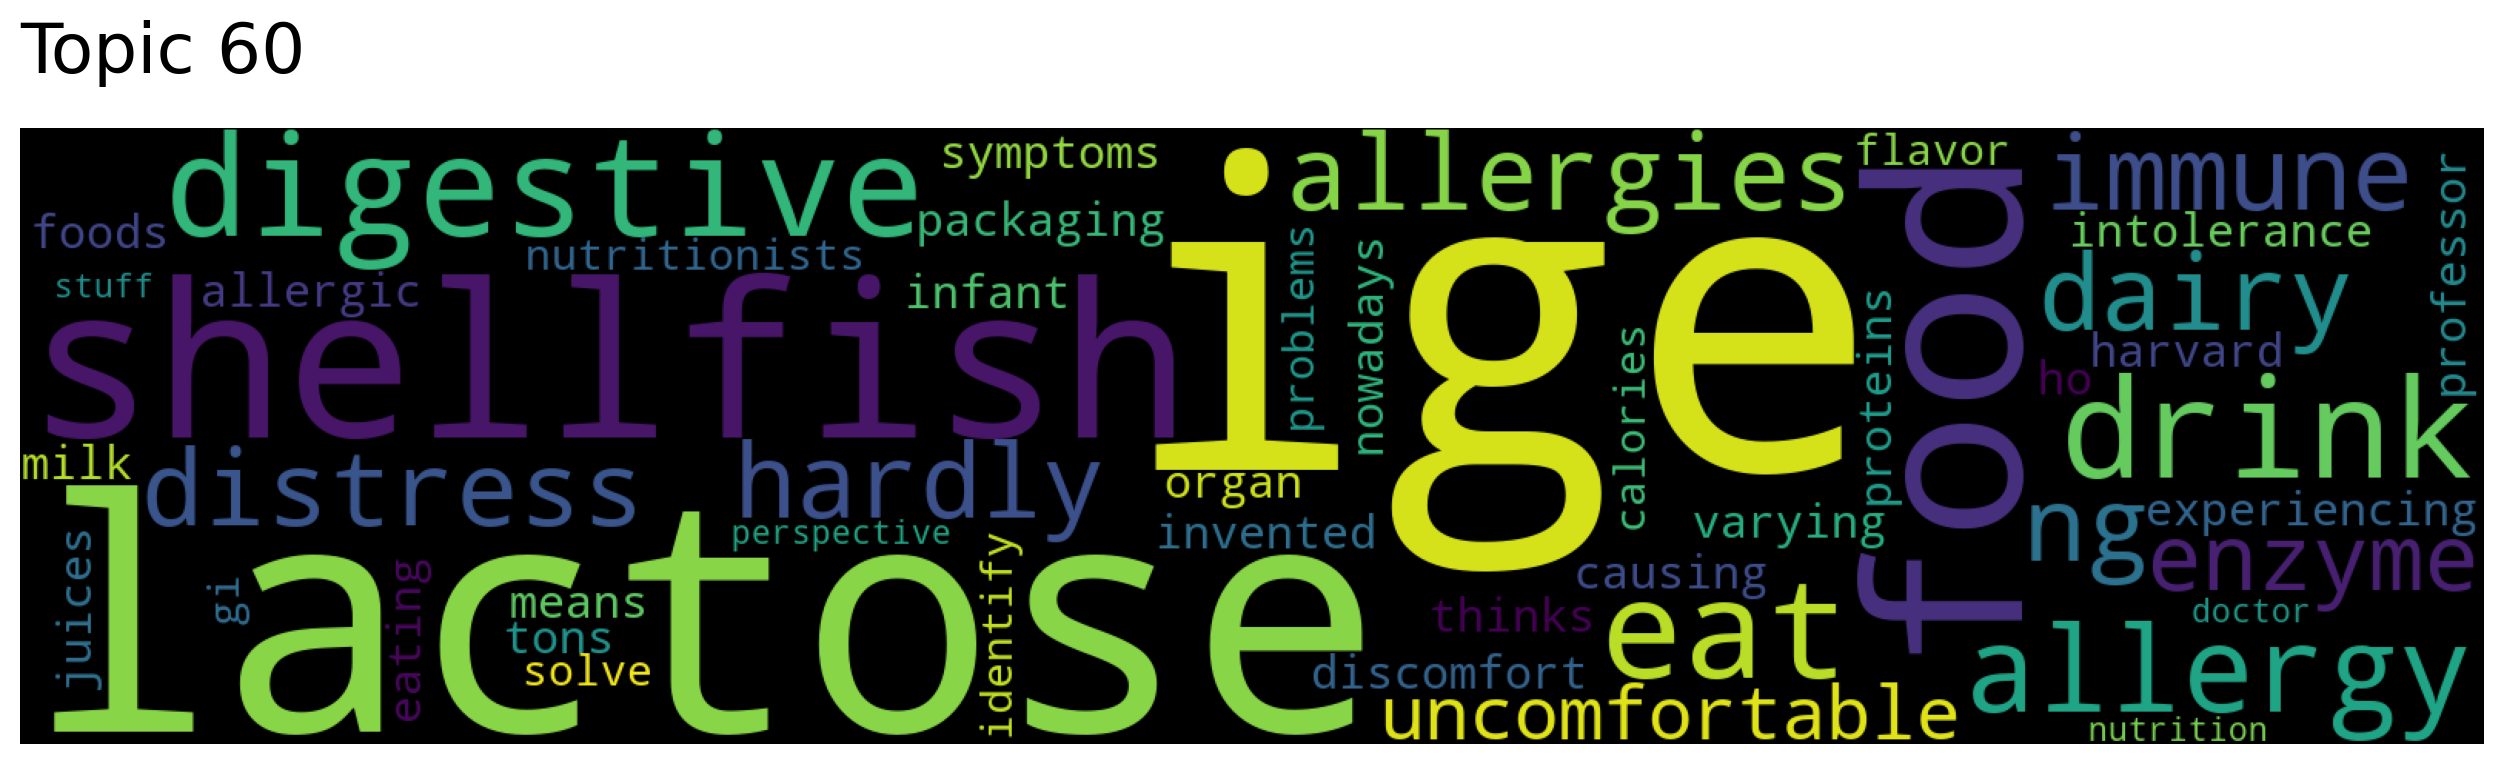

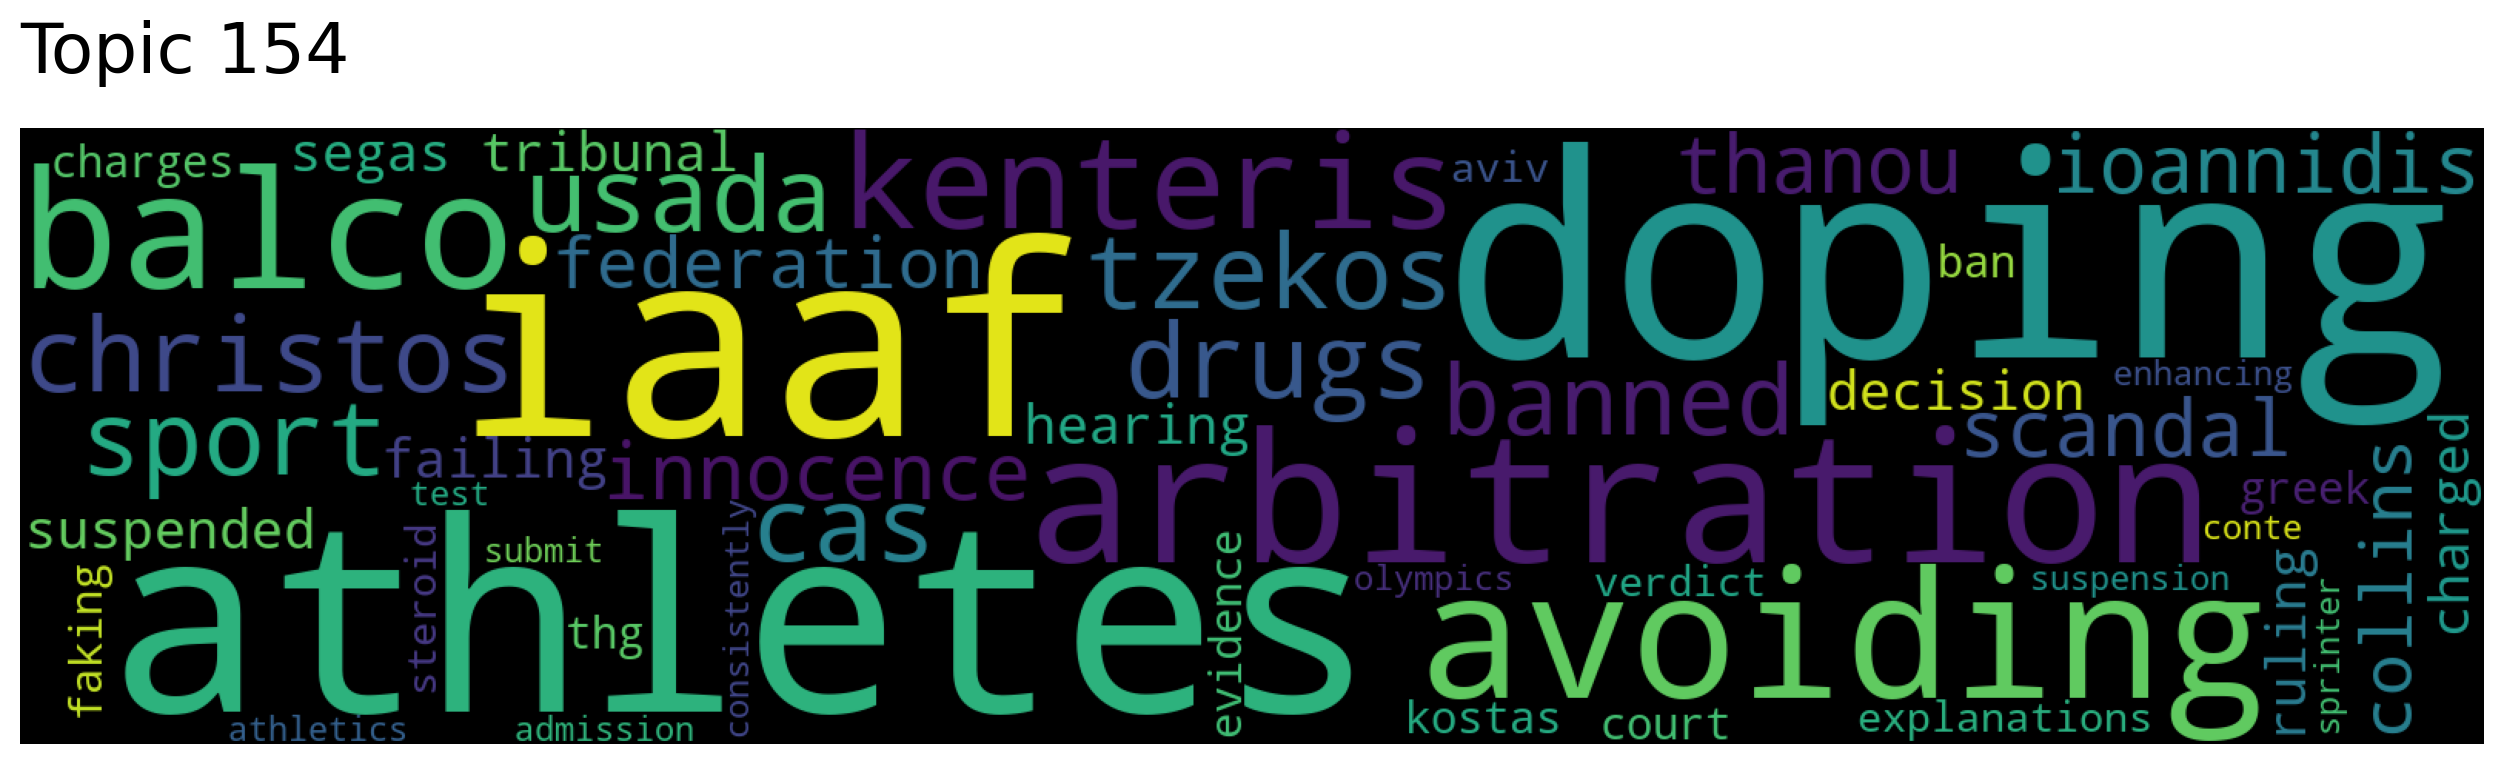

In [34]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["sport", "food"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [35]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["sport", "food"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1271, Score: 0.3146827816963196
-----------
Not everyone with a true food allergy will have the same symptoms, but they will all be governed by IgE. Conversely, people with food intolerances, like lactose intolerance, only get digestive symptoms. And listen, we're not here to dismiss the severity of your GI issues. If you're in genuine pain after you eat dairy, shellfish, or eggs, it might be best for you to avoid them. But when allergists are counting people with food allergies, they're not counting you. As the American Academy of Allergy Asthma and Immunology notes, these kinds of food intolerances are caused by enzyme deficiencies or some sensitivity to particular chemicals in food (natural or otherwise). Allergies, rather, must invoke the immune system.
-----------

Document: 7271, Score: 0.3106812536716461
-----------
Not everyone with a true food allergy will have the same symptoms, but they will all be governed by IgE. Conversely, people with food intolerances, like la

In [38]:
model.save(ModelDir + "model.bin")

In [ ]:
model.load(ModelDir + "model.bin")